# Exploring with Time Series
### Use the techniques in the lesson to explore the store item demand dataset and the opsd dataset.

### For the store item demand data, you will need to choose a method of aggregating such that each observation is a unique date. For both datasets you should choose a method of splitting your data and only explore the training split.

> "random noise" is a slightly innacurate way to describe this component. Technically this component is the residual, > or the error in our prediction. Similar to when we are examining linear regression models, any pattern observed in 
> the residuals of our model tell us that the model failed to capture that pattern. ↩

In [1]:
import Prepare

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('sales_joined_df.csv',index_col=0)

In [2]:
df = Prepare.set_index(df, 'sale_date')

In [3]:
df = Prepare.create_date_columns(df, ['year','month','weekday'],'index')

In [4]:
df['total_price'] = df.sale_amount * df.item_price

In [5]:
df.head()

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,year,month,weekday,total_price
sale_date,,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,2013,1,1,10.92
2013-01-01 00:00:00+00:00,14.0,118691,1015 S WW White Rd,San Antonio,6,TX,78220,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,2013,1,1,134.96
2013-01-01 00:00:00+00:00,29.0,350593,2118 Fredericksburg Rdj,San Antonio,3,TX,78201,Usda Produce,20,Plums Black,5.62,204040000000,204040000000,2013,1,1,162.98
2013-01-01 00:00:00+00:00,21.0,116865,1520 Austin Hwy,San Antonio,5,TX,78218,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,2013,1,1,202.44
2013-01-01 00:00:00+00:00,26.0,115039,516 S Flores St,San Antonio,4,TX,78204,Twinings Of London,7,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,70177154004,70177154004,2013,1,1,250.64


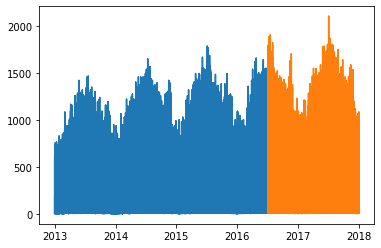

In [6]:
train_size = .70
n = df.shape[0]
test_start_index = round(train_size * n)

train = df[:test_start_index] # everything up (not including) to the test_start_index
test = df[test_start_index:] # everything from the test_start_index to the end

plt.plot(train.total_price)
plt.plot(test.total_price)

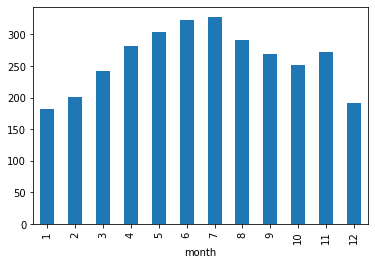

In [7]:
train.groupby('month').total_price.mean().plot.bar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb42296b90>]],
      dtype=object)

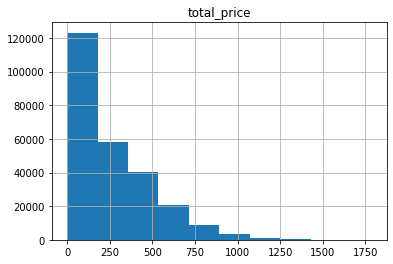

In [8]:
train[['total_price']].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fbb427927d0>,
      dtype=object)

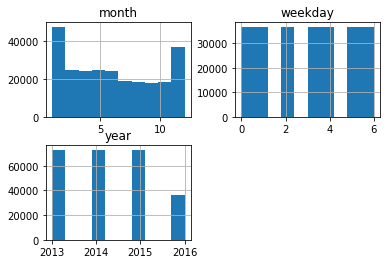

In [9]:
train[['month','year','weekday']].hist()

In [10]:
# less on weekends
train.weekday.value_counts()

4    36600
3    36600
2    36600
1    36600
5    36440
6    36400
0    36400
Name: weekday, dtype: int64

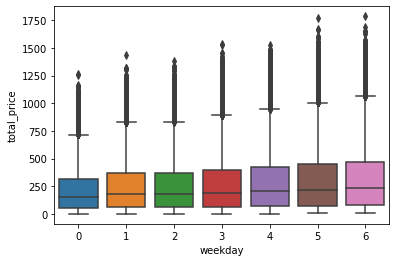

In [11]:
sns.boxplot(data=train, y='total_price',x='weekday')

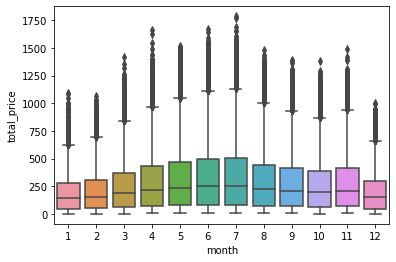

In [12]:
sns.boxplot(data=train, y='total_price',x='month')

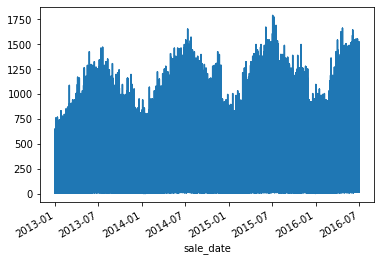

In [13]:
train['total_price'].plot()

In [14]:
y = train[['total_price']]

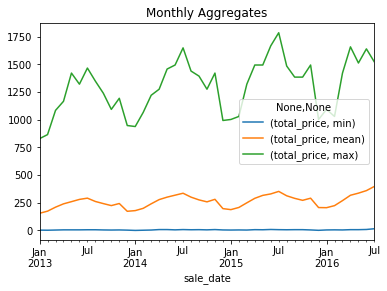

In [15]:
y.resample('M').agg(['min','mean','max']).plot(title='Monthly Aggregates')

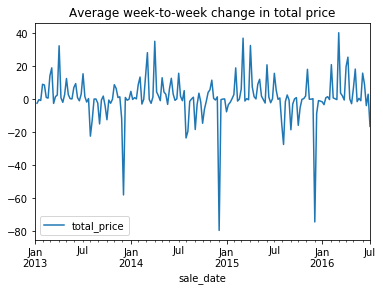

In [16]:
y.resample('W').mean().diff().plot(title='Average week-to-week change in total price')

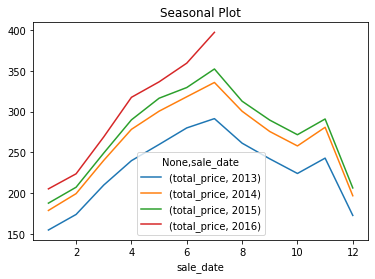

In [17]:
# .unstack turns an index level into columns
y.groupby([y.index.year, y.index.month]).mean().unstack(0).plot(title='Seasonal Plot')

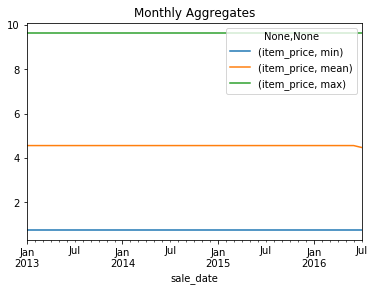

In [18]:
train[['item_price']].resample('M').agg(['min','mean','max']).plot(title='Monthly Aggregates')

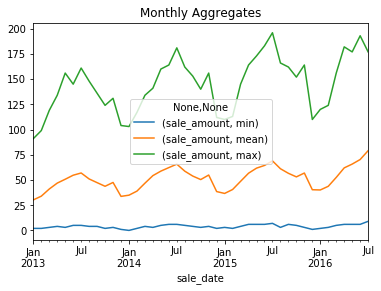

In [19]:
train[['sale_amount']].resample('M').agg(['min','mean','max']).plot(title='Monthly Aggregates')

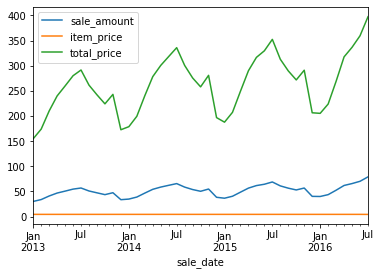

In [23]:
train[['sale_amount','item_price','total_price']].resample('M').mean().plot()

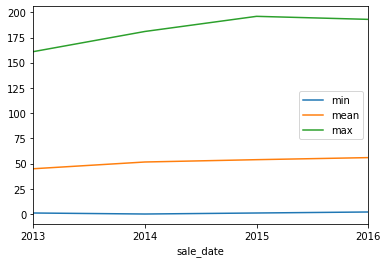

In [24]:
train['sale_amount'].resample('Y').agg(['min','mean','max']).plot()

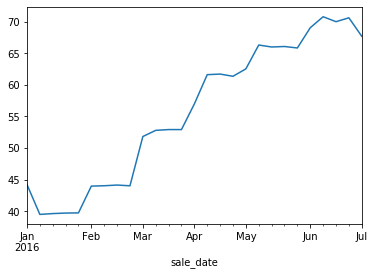

In [31]:
train[train.year==2016].sale_amount.resample('W').mean().plot()

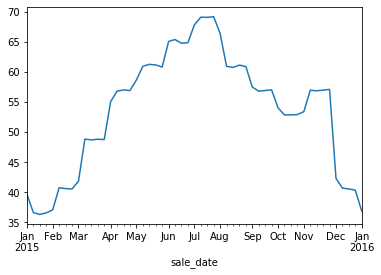

In [32]:
train[train.year==2015].sale_amount.resample('W').mean().plot()